In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
car=pd.read_csv('car.csv',names=('buy_price','maintain_cost','doors','passengers','boot','safty','acceptability'))
car

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
car.shape

(1728, 7)

In [4]:
car.head()

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
car.tail()

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [6]:
#checking for null values:
for i in car.columns:
    nl=car[i].isnull().sum()
    if nl>0:
        print('There are',nl,'number of null values in', i,' & the datatype= ',car[i].dtype)
else:
    print('This dataset has \'NO NULL VALUES.\'' )

This dataset has 'NO NULL VALUES.'


In [7]:
#checking for duplicated values
dups=car.duplicated(keep='first').sum()
if dups>0:
    c=car.drop_duplicates(keep='first')
    print('There were',dups,'number of duplicated values & they are removed.\n earlier the shape was',car.shape,
              '\nNow it is',c.shape)
else:
    print('There are \'NO DUPLICATED VALUES\' to Drop.')
    

There are 'NO DUPLICATED VALUES' to Drop.


In [8]:
car.min()

buy_price        high
maintain_cost    high
doors               2
passengers          2
boot              big
safty            high
acceptability     acc
dtype: object

In [9]:
car.max()

buy_price        vhigh
maintain_cost    vhigh
doors            5more
passengers        more
boot             small
safty              med
acceptability    vgood
dtype: object

In [10]:
car.columns.values

array(['buy_price', 'maintain_cost', 'doors', 'passengers', 'boot',
       'safty', 'acceptability'], dtype=object)

In [11]:
car.dtypes

buy_price        object
maintain_cost    object
doors            object
passengers       object
boot             object
safty            object
acceptability    object
dtype: object

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buy_price        1728 non-null object
maintain_cost    1728 non-null object
doors            1728 non-null object
passengers       1728 non-null object
boot             1728 non-null object
safty            1728 non-null object
acceptability    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
car.describe(include='object')

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,5more,more,big,med,unacc
freq,432,432,432,576,576,576,1210


In [14]:
for i in car.columns:
    vc=car[i].value_counts()
    print('++'*30,'\nThe Number of Unique Values in__',i,'is:\n',vc,'\n')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
The Number of Unique Values in__ buy_price is:
 vhigh    432
med      432
high     432
low      432
Name: buy_price, dtype: int64 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
The Number of Unique Values in__ maintain_cost is:
 vhigh    432
med      432
high     432
low      432
Name: maintain_cost, dtype: int64 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
The Number of Unique Values in__ doors is:
 5more    432
3        432
2        432
4        432
Name: doors, dtype: int64 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
The Number of Unique Values in__ passengers is:
 more    576
2       576
4       576
Name: passengers, dtype: int64 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
The Number of Unique Values in__ boot is:
 big      576
med      576
small    576
Name: boot, dtype: int64 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
The N

In [15]:
#mapping categorical values with numberical values
map1={'vhigh':4,'high':3,'med':2,'low':1}
car['buy_price']=car['buy_price'].map(map1)
car['maintain_cost']=car['maintain_cost'].map(map1)


map2={'small':1,'big':2,'med':3}
car['boot']=car['boot'].map(map2)


map3={'high':3,'med':2,'low':1}
car['safty']=car['safty'].map(map3)


map4={'unacc':1,'acc':2,'good':3,'vgood':4}   
car['acceptability']=car['acceptability'].map(map4)


car['passengers']=car['passengers'].replace(['more'],'4').astype('int64')
##putting capacity of 4 and more than that in 1 group

car['doors']=car['doors'].replace(['5more'],'4').astype('int64')
#putting no of doors 4 and more than that in 1 group

In [16]:
car.dtypes

buy_price        int64
maintain_cost    int64
doors            int64
passengers       int64
boot             int64
safty            int64
acceptability    int64
dtype: object

In [17]:
car.head(10)

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,3,1,1
4,4,4,2,2,3,2,1
5,4,4,2,2,3,3,1
6,4,4,2,2,2,1,1
7,4,4,2,2,2,2,1
8,4,4,2,2,2,3,1
9,4,4,2,4,1,1,1


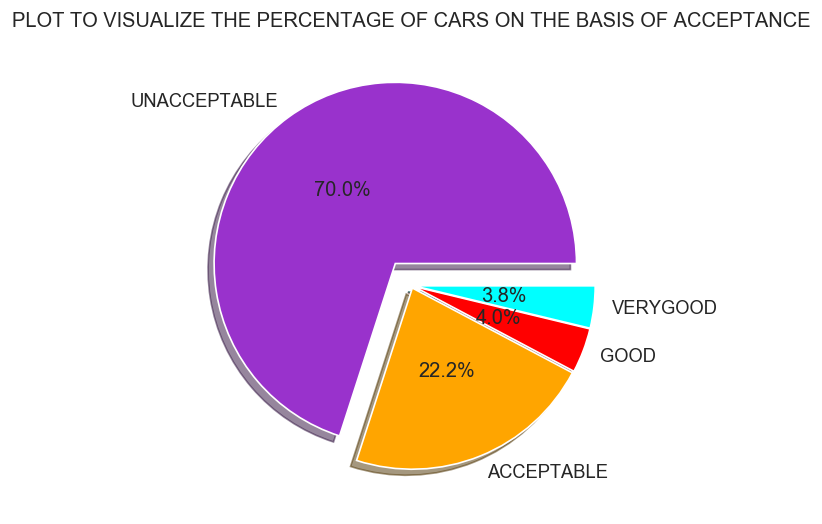

In [18]:
a_lb=('UNACCEPTABLE','ACCEPTABLE','GOOD','VERYGOOD')
a_val=car['acceptability'].value_counts().values.tolist()
exp=(0.15,0.015,0.015,0.015)
clr=('darkorchid','orange','red','aqua')
plt.figure(figsize=(10,5),dpi=120)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=a_val,explode=exp,labels=a_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.5, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF CARS ON THE BASIS OF ACCEPTANCE\n')
plt.show()

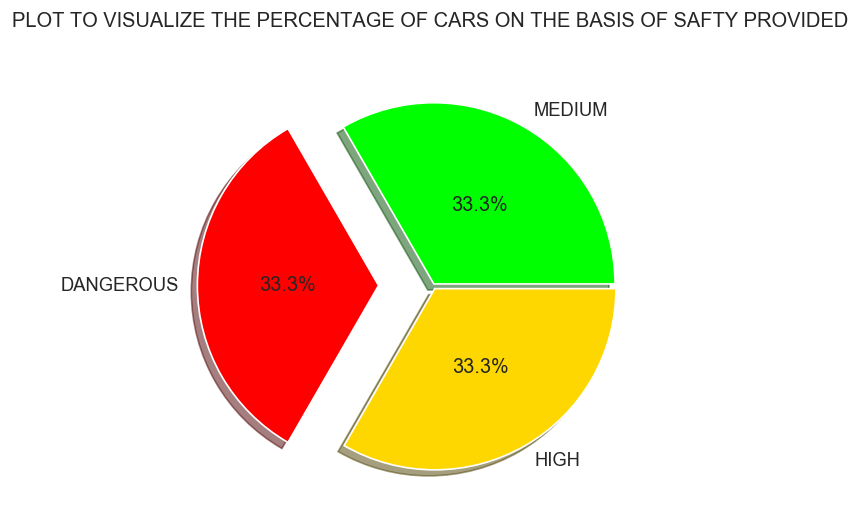

In [19]:
s_lb=('MEDIUM','DANGEROUS','HIGH')
s_val=car['safty'].value_counts().values.tolist()
exp=(0.01,0.3,0.02)
clr=('lime','red','gold')
plt.figure(figsize=(10,5),dpi=120)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=s_val,explode=exp,labels=s_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.5, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF CARS ON THE BASIS OF SAFTY PROVIDED \n')
plt.show()

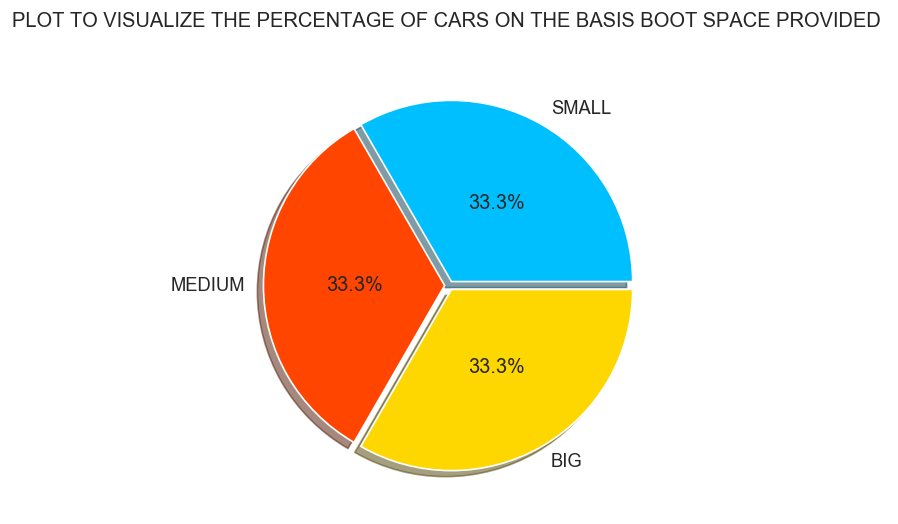

In [20]:
b_lb=('SMALL','MEDIUM','BIG')
b_val=car['boot'].value_counts().values.tolist()
exp=(0.025,0.025,0.025)
clr=('deepskyblue','orangered','gold')
plt.figure(figsize=(10,5),dpi=120)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=b_val,explode=exp,labels=b_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.5, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF CARS ON THE BASIS BOOT SPACE PROVIDED \n')
plt.show()

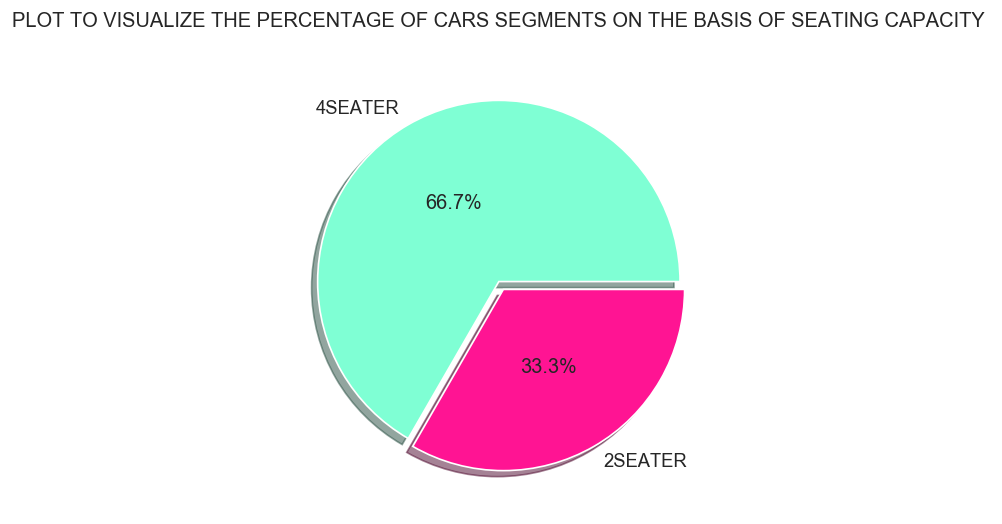

In [21]:
se_lb=('4SEATER','2SEATER')
se_val=car['passengers'].value_counts().values.tolist()
exp=(0.025,0.025)
clr=('aquamarine','deeppink')
plt.figure(figsize=(10,5),dpi=120)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=se_val,explode=exp,labels=se_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.5, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF CARS SEGMENTS ON THE BASIS OF SEATING CAPACITY \n')
plt.show()

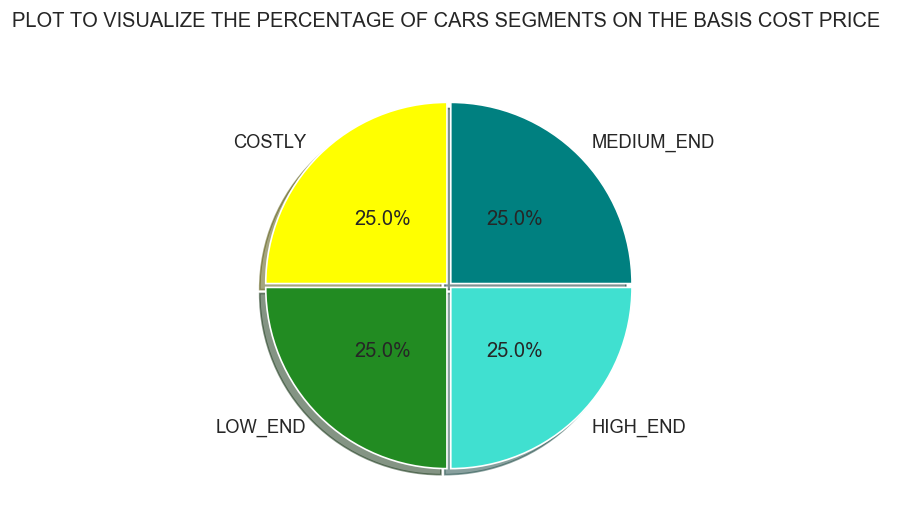

In [22]:
c_lb=('MEDIUM_END','COSTLY','LOW_END','HIGH_END')
c_val=car['buy_price'].value_counts().values.tolist()
exp=(0.015,0.015,0.015,0.015)
clr=('teal','yellow','forestgreen','turquoise')
plt.figure(figsize=(10,5),dpi=120)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=c_val,explode=exp,labels=c_lb,colors=clr,autopct='%2.1f%%',pctdistance=0.5, shadow=True,radius=1)
plt.title('PLOT TO VISUALIZE THE PERCENTAGE OF CARS SEGMENTS ON THE BASIS COST PRICE \n')
plt.show()

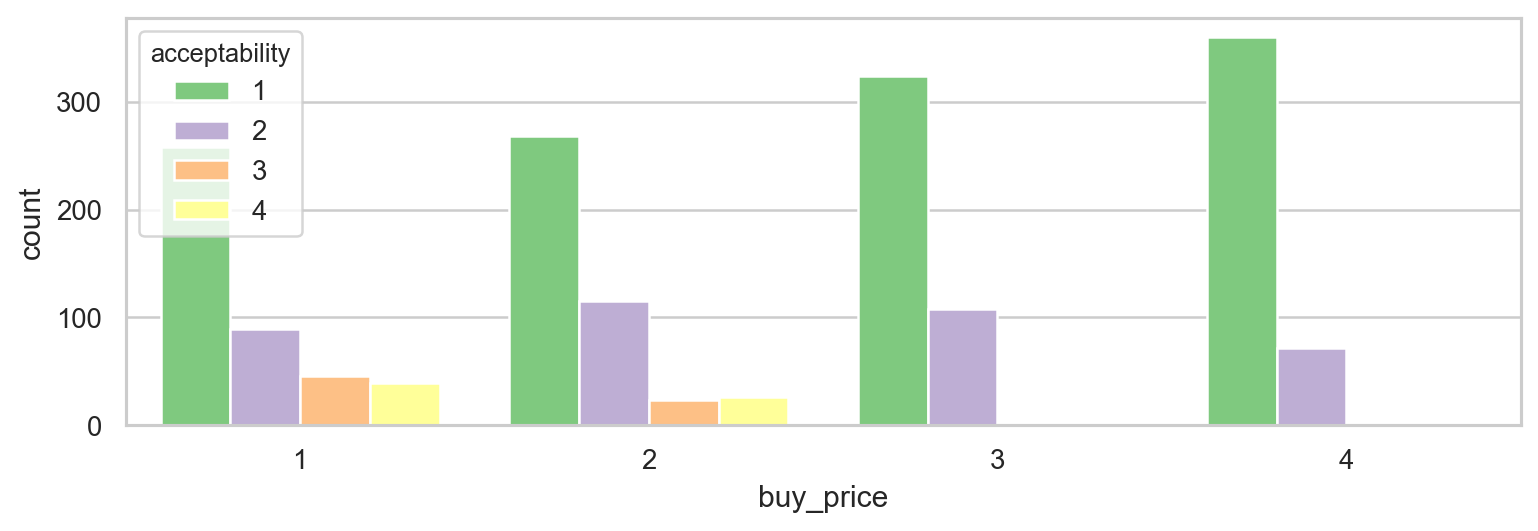

In [23]:
plt.figure(figsize=(10,3),dpi=180)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
sns.countplot(x='buy_price',hue='acceptability',data=car,orient='v',color='greenyellow',palette='Accent',saturation=15)
plt.show()

                                        Higher the price higher the unacceptibility count

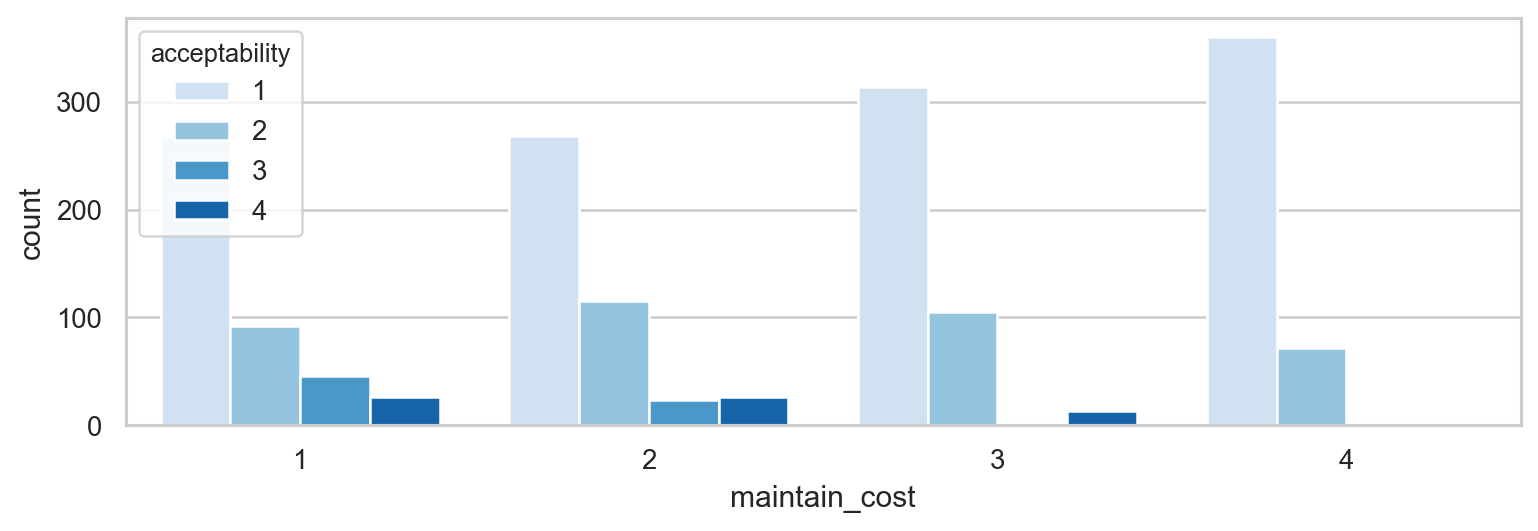

In [24]:
plt.figure(figsize=(10,3),dpi=180)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
sns.countplot(x='maintain_cost',hue='acceptability',data=car,orient='v',palette='Blues',saturation=15)
plt.show()

                                        HIGHER THE MAINTAINANCE COST LOWER THE ACCEPTIBILITY

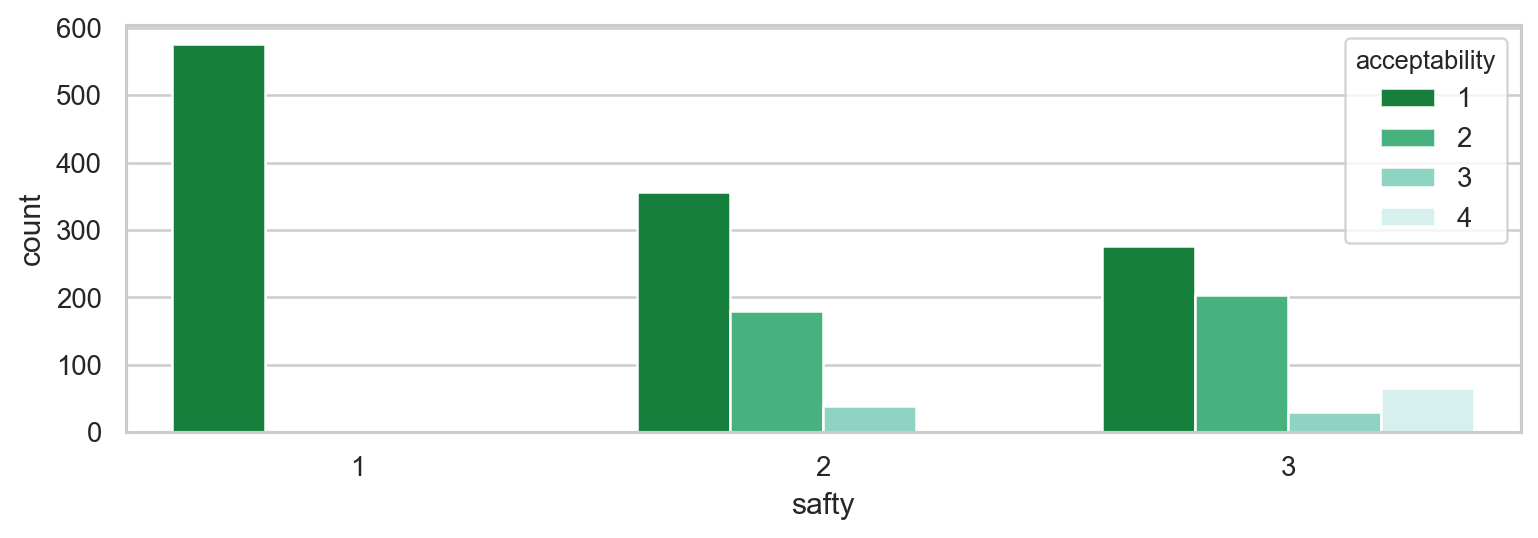

In [25]:
plt.figure(figsize=(10,3),dpi=180)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
sns.countplot(x='safty',hue='acceptability',data=car,orient='v',color='greenyellow',palette='BuGn_r',saturation=15)
plt.show()

                                            HIGHER SAFTY HAS HIGH ACCEPTANCE

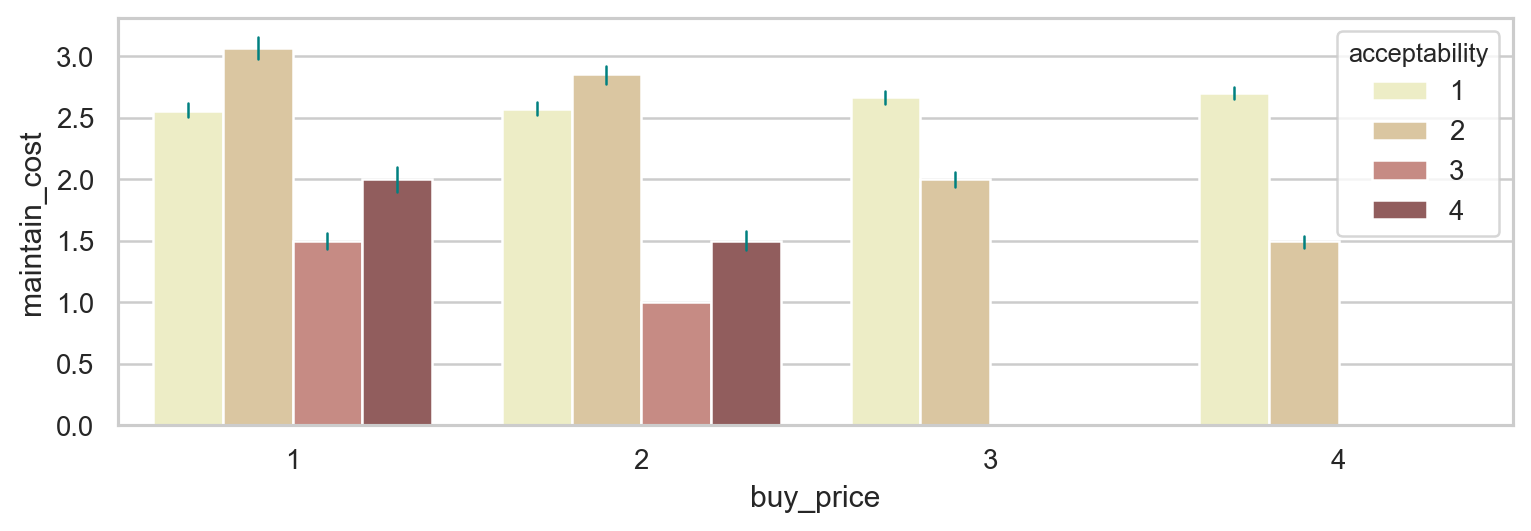

In [26]:
plt.figure(figsize=(10,3),dpi=180)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
sns.barplot(x='buy_price',y='maintain_cost',hue='acceptability',data=car,ci=58,orient='v',palette='pink_r',saturation=25,errcolor='teal',errwidth=1)

                    AT LOWER BUY PRICE  A MEDIUM MAINTAINANCE COST IS HIGHLY ACCEPTABLE

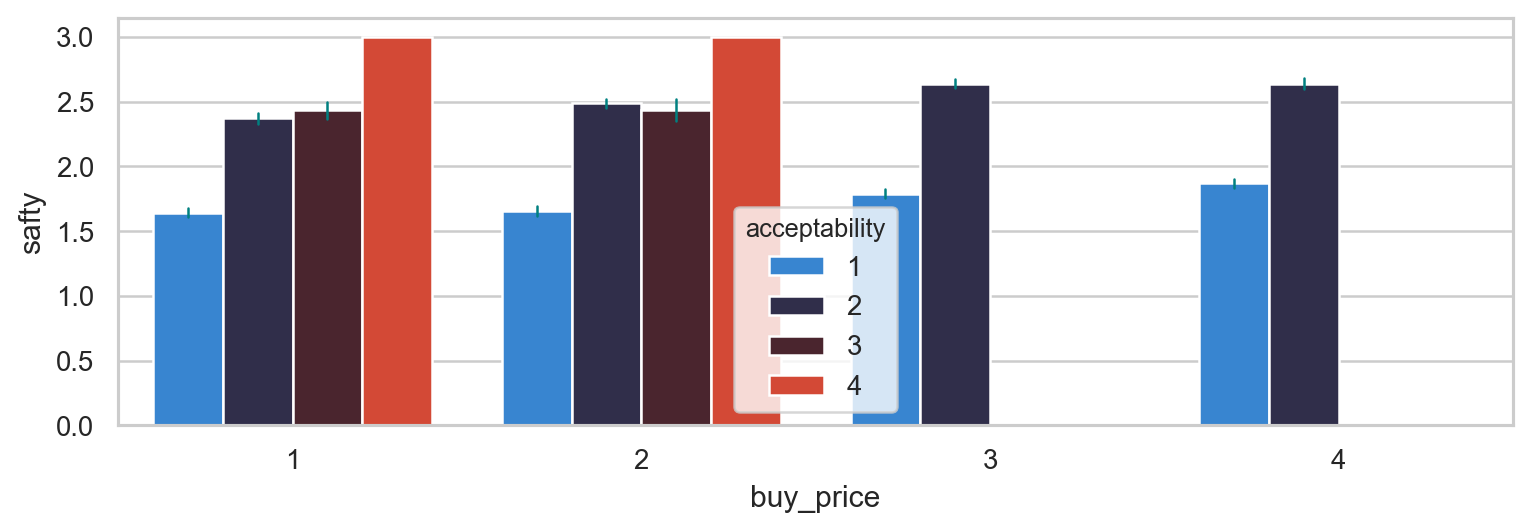

In [27]:
plt.figure(figsize=(10,3),dpi=180)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
sns.barplot(x='buy_price',y='safty',hue='acceptability',data=car,ci=58,orient='v',palette='icefire',saturation=25,errcolor='teal',errwidth=1)

                                    AT LOW BUY PRICE A HIGHER SAFTY IS ACCEPTABLE

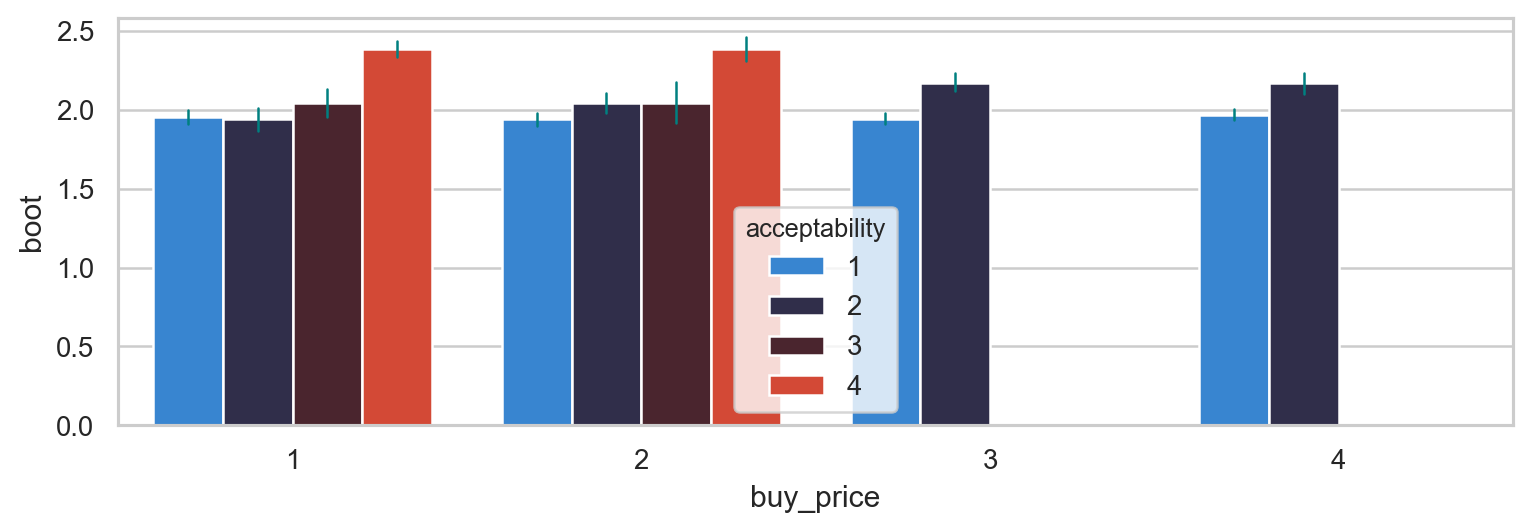

In [28]:
plt.figure(figsize=(10,3),dpi=180)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
sns.barplot(x='buy_price',y='boot',hue='acceptability',data=car,ci=58,orient='v',palette='icefire',saturation=25,errcolor='teal',errwidth=1)

                AT A BUY PRICE OF LOW AND MEDIUM SCALE A BIG BOOT SPACE IS MUCH ACCEPTABLE

<Figure size 1440x360 with 0 Axes>

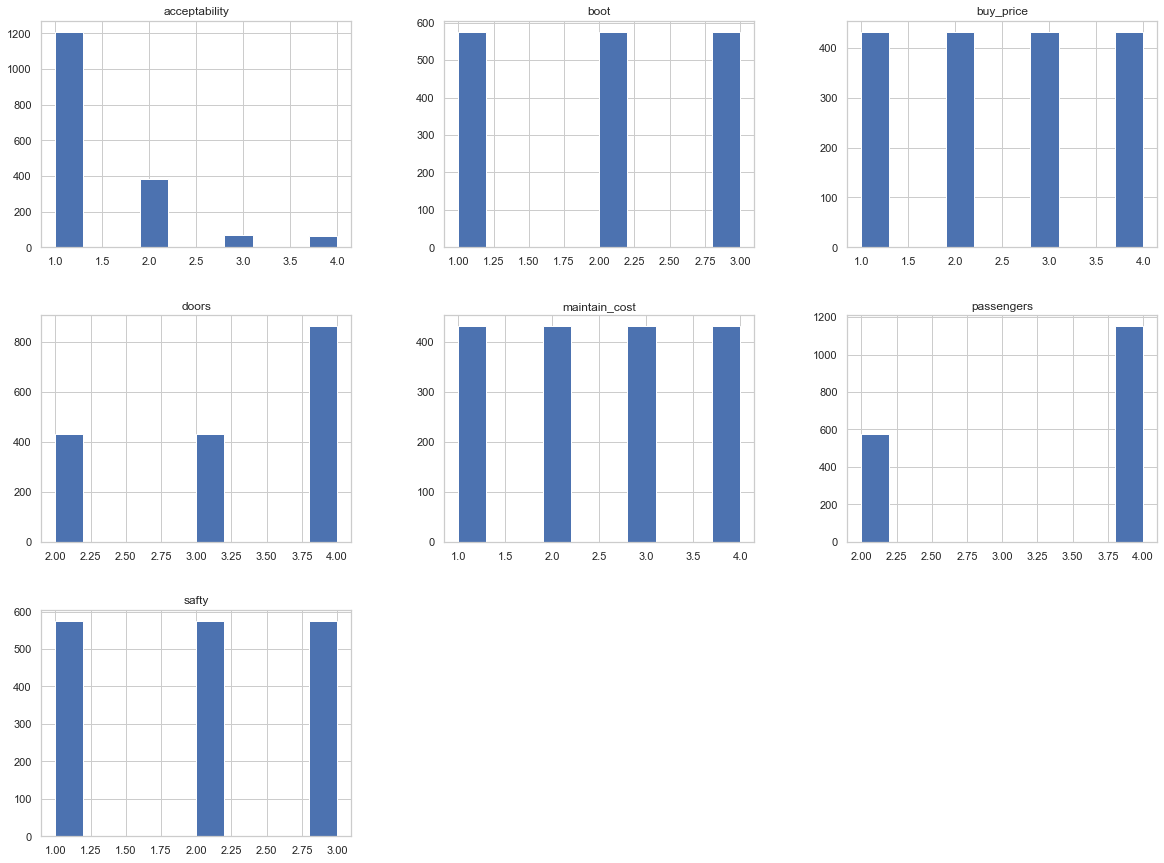

In [29]:
#Histogram to visualize spread
sns.set_context('talk',font_scale=1.9)
sns.set(style='whitegrid')
plt.figure(figsize=(12,3),dpi=120)
car.hist(figsize=(20,15),grid=True)
plt.show()


In [30]:
cl=car.columns.values
cl

array(['buy_price', 'maintain_cost', 'doors', 'passengers', 'boot',
       'safty', 'acceptability'], dtype=object)

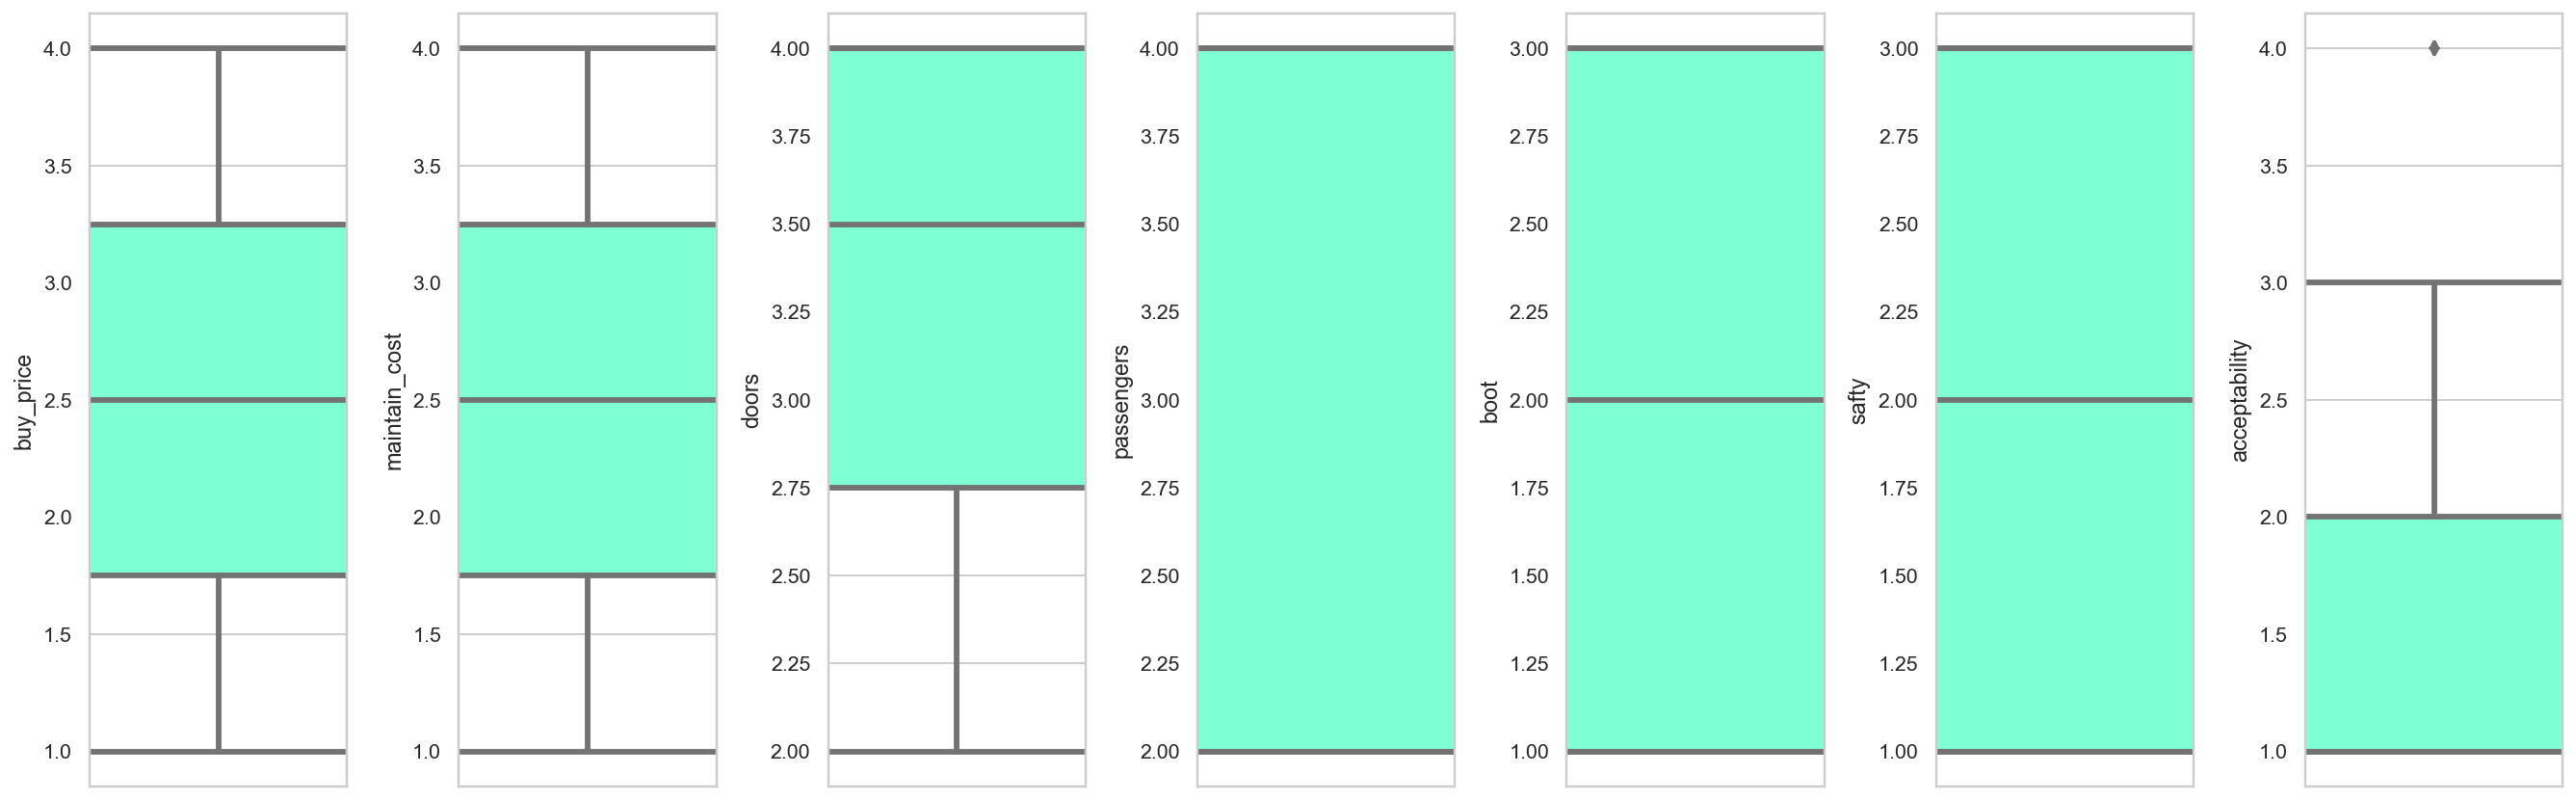

In [31]:
plt.figure(figsize=(22,12),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,7):
    plt.subplot(2,8,i+1)
    sns.boxplot(car[cl[i]],orient='v',color='aquamarine',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [32]:
z=np.abs(zscore(car))
z

array([[1.34164079, 1.34164079, 1.50755672, ..., 1.22474487, 1.22474487,
        0.56034935],
       [1.34164079, 1.34164079, 1.50755672, ..., 1.22474487, 0.        ,
        0.56034935],
       [1.34164079, 1.34164079, 1.50755672, ..., 1.22474487, 1.22474487,
        0.56034935],
       ...,
       [1.34164079, 1.34164079, 0.90453403, ..., 0.        , 1.22474487,
        0.56034935],
       [1.34164079, 1.34164079, 0.90453403, ..., 0.        , 0.        ,
        2.1405814 ],
       [1.34164079, 1.34164079, 0.90453403, ..., 0.        , 1.22474487,
        3.49104677]])

In [33]:
print(np.where(z>3))

(array([1097, 1106, 1124, 1130, 1133, 1148, 1151, 1157, 1160, 1175, 1178,
       1184, 1187, 1205, 1214, 1232, 1238, 1241, 1256, 1259, 1265, 1268,
       1283, 1286, 1292, 1295, 1421, 1430, 1448, 1454, 1457, 1472, 1475,
       1481, 1484, 1499, 1502, 1508, 1511, 1529, 1538, 1556, 1562, 1565,
       1580, 1583, 1589, 1592, 1607, 1610, 1616, 1619, 1637, 1646, 1664,
       1670, 1673, 1688, 1691, 1697, 1700, 1715, 1718, 1724, 1727],
      dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype=int64))


In [34]:
print(z[1097][6],'\n',z[1727][6],'\n',z[1700][6])

3.4910467746072245 
 3.4910467746072245 
 3.4910467746072245


In [35]:
veh=car[(z<3).all(axis=1)]

In [36]:
print('The shape before outlier removal:\t',car.shape,'\nThe shape after outlier removal:\t',veh.shape,
      '\nSo a total of',len(car)-len(veh),'rows has been removed')

The shape before outlier removal:	 (1728, 7) 
The shape after outlier removal:	 (1663, 7) 
So a total of 65 rows has been removed


In [37]:
veh

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,3,1,1
4,4,4,2,2,3,2,1
...,...,...,...,...,...,...,...
1721,1,1,4,4,1,3,3
1722,1,1,4,4,3,1,1
1723,1,1,4,4,3,2,3
1725,1,1,4,4,2,1,1


In [38]:
veh['acceptability'].value_counts()

1    1210
2     384
3      69
Name: acceptability, dtype: int64

In [39]:
car.head(5)

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,3,1,1
4,4,4,2,2,3,2,1


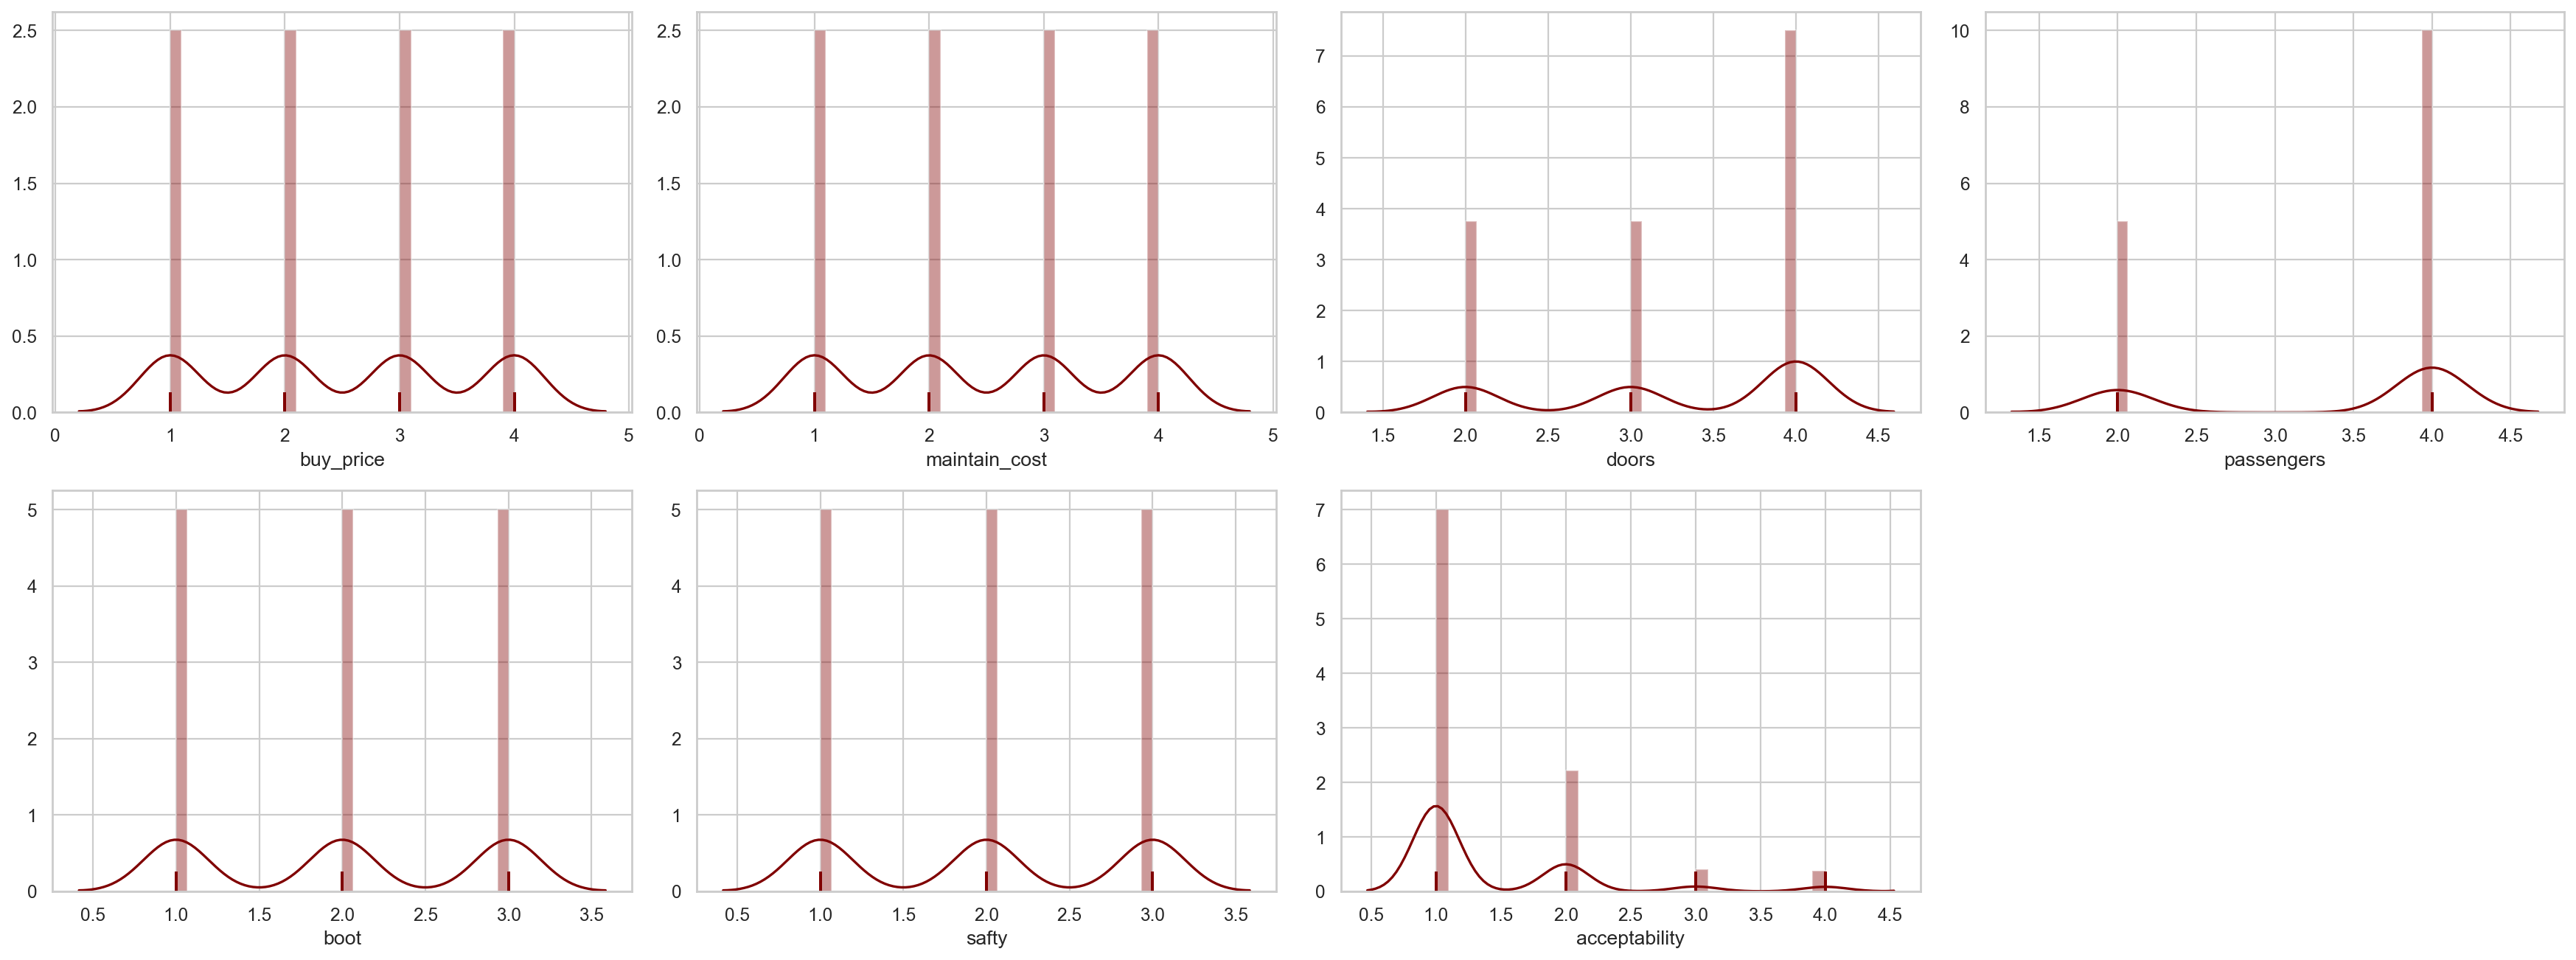

In [40]:
#using distplot so visualize the frequency of distributon of attributes
plt.figure(figsize=(22,20),dpi=160)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,7):
    plt.subplot(5,4,i+1)
    sns.distplot(car[cl[i]],color='maroon',kde=True,rug=True,hist=True,bins=30)
plt.tight_layout()

In [41]:
car.skew()

buy_price        0.000000
maintain_cost    0.000000
doors           -0.493811
passengers      -0.707721
boot             0.000000
safty            0.000000
acceptability    1.980212
dtype: float64

No skew found 

In [42]:
#checking co_relation
car_corr=car.corr()
car_corr

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
buy_price,1.000000e+00,0.000000e+00,0.000000e+00,-7.436140e-18,0.000000e+00,0.000000,-0.282750
maintain_cost,0.000000e+00,1.000000e+00,0.000000e+00,-7.436140e-18,0.000000e+00,0.000000,-0.232422
doors,0.000000e+00,0.000000e+00,1.000000e+00,4.446350e-17,0.000000e+00,0.000000,0.071398
passengers,-7.436140e-18,-7.436140e-18,4.446350e-17,1.000000e+00,-3.338477e-19,0.000000,0.396227
boot,0.000000e+00,0.000000e+00,0.000000e+00,-3.338477e-19,1.000000e+00,0.000000,0.106245
safty,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.439337
acceptability,-2.827504e-01,-2.324215e-01,7.139799e-02,3.962268e-01,1.062450e-01,0.439337,1.000000


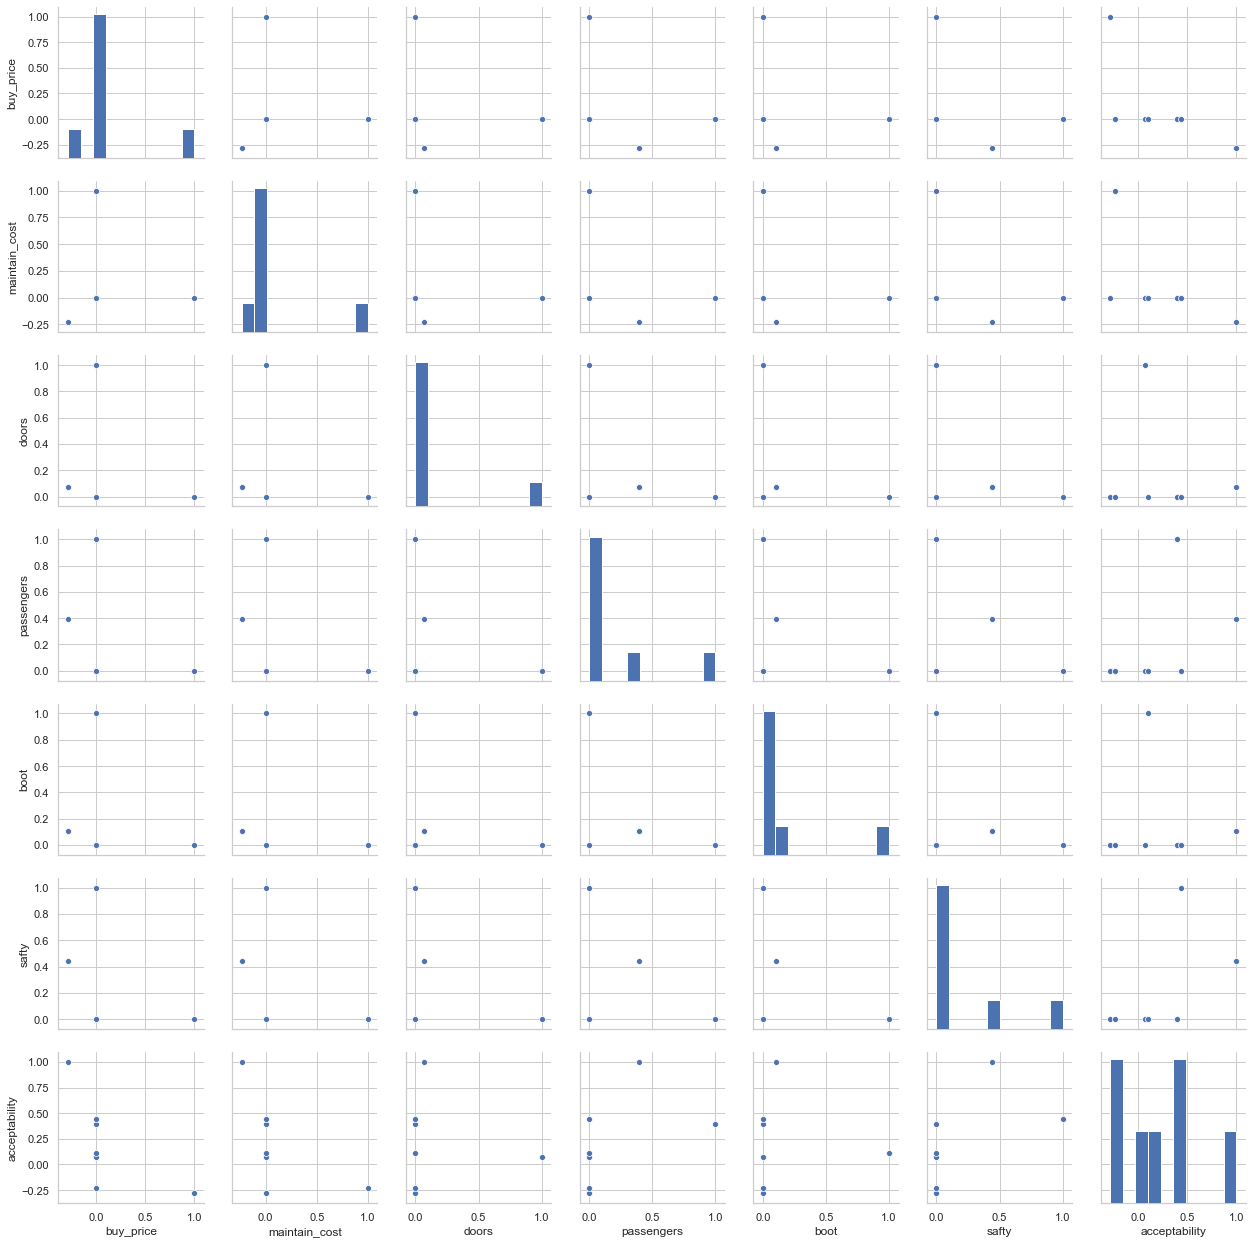

In [43]:
sns.pairplot(car_corr)

In [61]:
#importing important libraries for model generation 
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS
from sklearn.model_selection import train_test_split ,RandomizedSearchCV as rsv, cross_val_score as cvs
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [45]:
car.head(3)

,buy_price,maintain_cost,doors,passengers,boot,safty,acceptability
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1


In [46]:
#splitting datset into x and y for testing and training 
x=car.iloc[:,0:6]
y=car.iloc[:,-1]
print('shape of x:',x.shape,'\nshape of y:',y.shape)

shape of x: (1728, 6) 
shape of y: (1728,)


In [47]:
#implementing sandard scaler for scaling the inputs
ss=StandardScaler()
x=ss.fit_transform(x)

In [48]:
#converting y into np.array form and reshaping it
y=np.array(y)
y=y.reshape(-1,1)
print('shape of y=',y.shape)

shape of y= (1728, 1)


In [49]:
#creating function to achive optimum performing random state
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nCLASSIFICATION REPORT\n:',clr)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nPERCENTAGE OF ACCURACY =',(max_ac_score*100).mean().round(5))
   

DECISION TREE CLASSIFIER

In [50]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=70)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [51]:
dtc=DecisionTreeClassifier(splitter='best',min_samples_split=4,max_depth=8,criterion='entropy')
acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

The best suited random_score is:  73 

Accuracy score: 0.971900826446281

CLASSIFICATION REPORT
:               precision    recall  f1-score   support

           1       0.99      0.98      0.98       424
           2       0.88      0.94      0.91       134
           3       0.84      0.70      0.76        30
           4       0.88      0.88      0.88        17

    accuracy                           0.95       605
   macro avg       0.90      0.87      0.88       605
weighted avg       0.95      0.95      0.95       605


CONFUSION MATRIX:
 [[414  10   0   0]
 [  4 126   2

In [52]:
#using cross_val_score to check for over/under fitting of Decision Tree Model
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=50)
print('THE MEAN PERCENTAGE OF ACCURACY SCORE AT DECISION TREE MODEL IS=',(dtc_accuracy.mean()*100).round(5))


THE MEAN PERCENTAGE OF ACCURACY SCORE AT DECISION TREE MODEL IS= 94.13954


SUPPORT VECTOR CLASSIFIER

In [53]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=70)
svc_rsv.fit(x,y)
print(svc_rsv)
print('\nbest score=', svc_rsv.best_score_)
print("\nbest parameters for SVC=\n",svc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.9403935185185185

best parameters for SVC=
 {'kernel': 'rbf', 'gamma': 0.1}


In [54]:
svc=SVC(kernel='rbf',gamma=0.1,degree=5)
acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 

The best suited random_score is:  73 

Accuracy score: 0.9768595041322314

CLASSIFICATION REPORT
:               precision    recall  f1-score   support

           1       0.99      0.98      0.98       424
           2       0.88      0.94      0.91       134
           3       0.84      0.70      0.76        30
           4       0.88      0.88      0.88        17

    accuracy                           0.95       605
   macro avg       0.90      0.87      0.88       605
weighted avg       0.95      0.95      0.95       605


CONFUSION MATRIX:
 [[414  10   0   0]
 [  4 126   

In [56]:
#using cross_val_score to check for over/under fitting of SVC Model
svc_accuracy=cvs(svc,x,y,scoring='accuracy',cv=50)
print('THE MEAN PERCENTAGE OF ACCURACY SCORE AT SVC MODEL IS=',(svc_accuracy.mean()*100).round(5))


THE MEAN PERCENTAGE OF ACCURACY SCORE AT SVC MODEL IS= 93.70966


K NEIGHBORS CLASSIFIER

In [57]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute']}
knc_rsv=rsv(knc,knc_para,cv=30)
knc_rsv.fit(x,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.9224537037037037

best parameters for KNC=
 {'n_neighbors': 28, 'algorithm': 'brute'}


In [58]:
knc=KNeighborsClassifier(n_neighbors=28,algorithm='brute')
acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform') 

The best suited random_score is:  86 

Accuracy score: 0.9553719008264463

CLASSIFICATION REPORT
:               precision    recall  f1-score   support

           1       0.97      0.99      0.98       424
           2       0.79      0.92      0.85       134
           3       1.00      0.20      0.33        30
           4       0.71      0.59      0.65        17

    accuracy                           0.92       605
   macro avg       0.87      0.67      0.70       605
weighted avg       0.93      0.92      0.91       605


CONFUSION MATRIX:
 [[418   6   0   0]
 [ 11 123   0   0]
 [  0  20   6   4]
 [  0   7   0  10]]

PERCENTAGE OF ACCURACY = 95.53719


In [60]:
#using cross_val_score to check for over/under fitting of KNC Model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=50)
print('THE MEAN PERCENTAGE OF ACCURACY SCORE AT KNC MODEL IS=',(knc_accuracy.mean()*100).round(5))


THE MEAN PERCENTAGE OF ACCURACY SCORE AT KNC MODEL IS= 93.32376


RANDOM FOREST CLASSIFIER

In [64]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,300],'max_depth':[4,6],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=30)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [65]:
rfc=RandomForestClassifier(n_estimators=200,max_depth=6,criterion='entropy')
acusr(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  68 

Accuracy score: 0.9652892561983472

CLASSIFICATION REPORT
:               precision    recall  f1-score   support

           1       0.99      0.97      0.98       424
           2       0.79      0.97      0.87       134
           3       1.00      0.30      0.46        30
           4       0.80      0.71      0.75        17

    accuracy                           0.93       605
   macro avg       0.89      0.74      0.76       605
weighted avg       0

In [66]:
#using cross_val_score to check for over/under fitting of RFC Model
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=50)
print('THE MEAN PERCENTAGE OF ACCURACY SCORE AT RFC MODEL IS=',(rfc_accuracy.mean()*100).round(5))


THE MEAN PERCENTAGE OF ACCURACY SCORE AT RFC MODEL IS= 91.80045


GRADIENT BOOSTING CLASSIFIER

In [68]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
para= {"learning_rate": [0.001,0.025],"n_estimators":[250,300]}
gbc_rs= rsv(gbc,para,cv=70)
gbc_rs.fit(x_train,y_train)
print(gbc_rs)
print("\nbest parameters:",gbc_rs.best_params_)
print("\n best score:",gbc_rs.best_score_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [69]:
gbc=GradientBoostingClassifier(learning_rate=0.025,n_estimators=300)
acusr(gbc,x,y)

In this GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.025, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

The best suited random_score is:  61 

Accuracy score: 0.9818181818181818

CLASSIFICATION REPORT
:               precision    recall  f1-score   support

           1       0.99      0.98      0.99       424
           2       0.93      0.96      0.95       134
           3       0.97      0.97      0.97       

In [70]:
#using cross_val_score to check for over/under fitting of GBC Model
gbc_accuracy=cvs(gbc,x,y,scoring='accuracy',cv=50)
print('THE MEAN PERCENTAGE OF ACCURACY SCORE AT GBC MODEL IS=',(gbc_accuracy.mean()*100).round(5))


THE MEAN PERCENTAGE OF ACCURACY SCORE AT GBC MODEL IS= 96.02142


In [71]:
results=[['DTC',73,97.19008,94.13954],
         ['SVC',73,97.68595,93.70966],
         ['KNC',86,95.53719,93.32376],
         ['RFC',68,96.52893,91.80045],
         ['GBC',61,98.18182,96.02142]]
df=pd.DataFrame(results,columns=['MODEL','RST','ACCU W\O CV','ACCURACY W CV'])
df.style.set_properties({'color': 'yellow','border-color': 'cyan'})
df.style.background_gradient(cmap='gist_ncar', low=0, high=175)


,MODEL,RST,ACCU W\O CV,ACCURACY W CV
0,DTC,73,97.1901,94.1395
1,SVC,73,97.686,93.7097
2,KNC,86,95.5372,93.3238
3,RFC,68,96.5289,91.8004
4,GBC,61,98.1818,96.0214


In [72]:
joblib.dump(gbc,'CAR_VAl_GBC.pkl')

['CAR_VAl_GBC.pkl']